In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading data from 2019

file_path = "/content/drive/MyDrive/2019.csv"
df_2019 = pd.read_csv(file_path)
df_2019.head()

,ONS ID,ONS region ID,Constituency name,County name,Region name,Country name,Constituency type,Party name,Party abbreviation,Electoral Commission party ID,...,Electoral Commission adjunct party ID,Candidate first name,Candidate surname,Candidate gender,Sitting MP,Former MP,Member MNIS ID,Votes,Share,Change
0,W07000049,W92000004,Aberavon,West Glamorgan,Wales,Wales,County,Conservative,Con,PP52,...,NaN,Charlotte,Lang,Female,No,No,NaN,6518,0.206279,0.028901
1,W07000049,W92000004,Aberavon,West Glamorgan,Wales,Wales,County,Green Party,Green,PP63,...,NaN,Giorgia,Finney,Female,No,No,NaN,450,0.014241,NaN
2,W07000049,W92000004,Aberavon,West Glamorgan,Wales,Wales,County,Independent,Ind,NaN,...,NaN,Captain,Beany,Male,No,No,NaN,731,0.023134,NaN
3,W07000049,W92000004,Aberavon,West Glamorgan,Wales,Wales,County,Labour,Lab,PP53,...,NaN,Stephen,Kinnock,Male,Yes,Yes,4359.0,17008,0.538262,-0.142933
4,W07000049,W92000004,Aberavon,West Glamorgan,Wales,Wales,County,Liberal Democrat,LD,PP90,...,NaN,Sheila,Kingston-Jones,Female,No,No,NaN,1072,0.033926,0.015921


In [70]:
# Loading data from 2024

file_pathh = "/content/drive/MyDrive/2024.csv"
df_2024 = pd.read_csv(file_pathh)
df_2024.head()

,ONS ID,ONS region ID,Constituency name,County name,Region name,Country name,Constituency type,Party name,Party abbreviation,Electoral Commission party ID,...,Candidate first name,Candidate surname,Candidate gender,Sitting MP,Former MP,Member MNIS ID,Votes,Share,Change,DC Person ID
0,W07000081,W92000004,Aberafan Maesteg,NaN,Wales,Wales,County,Heritage Party,HPUK,PP12550,...,Rhiannon,Morrissey,Female,No,No,NaN,183,0.005118,NaN,117009
1,W07000081,W92000004,Aberafan Maesteg,NaN,Wales,Wales,County,Independent,Ind,NaN,...,Captain,Beany,Male,No,No,NaN,618,0.017284,NaN,20
2,W07000081,W92000004,Aberafan Maesteg,NaN,Wales,Wales,County,Liberal Democrat,LD,PP90,...,Justin,Griffiths,Male,No,No,NaN,916,0.025619,-0.011412,89373
3,W07000081,W92000004,Aberafan Maesteg,NaN,Wales,Wales,County,Green,Green,PP63,...,Nigel,Hill,Male,No,No,NaN,1094,0.030597,0.014817,92890
4,W07000081,W92000004,Aberafan Maesteg,NaN,Wales,Wales,County,Conservative,Con,PP52,...,Abigail,Mainon,Female,No,No,NaN,2903,0.081191,-0.145088,72976


In [71]:
# Merging data from 2019 and 2024
df = pd.concat([df_2019,df_2024])
print(df.shape)
df.head()

(7835, 22)


,ONS ID,ONS region ID,Constituency name,County name,Region name,Country name,Constituency type,Party name,Party abbreviation,Electoral Commission party ID,...,Candidate first name,Candidate surname,Candidate gender,Sitting MP,Former MP,Member MNIS ID,Votes,Share,Change,DC Person ID
0,W07000049,W92000004,Aberavon,West Glamorgan,Wales,Wales,County,Conservative,Con,PP52,...,Charlotte,Lang,Female,No,No,NaN,6518,0.206279,0.028901,NaN
1,W07000049,W92000004,Aberavon,West Glamorgan,Wales,Wales,County,Green Party,Green,PP63,...,Giorgia,Finney,Female,No,No,NaN,450,0.014241,NaN,NaN
2,W07000049,W92000004,Aberavon,West Glamorgan,Wales,Wales,County,Independent,Ind,NaN,...,Captain,Beany,Male,No,No,NaN,731,0.023134,NaN,NaN
3,W07000049,W92000004,Aberavon,West Glamorgan,Wales,Wales,County,Labour,Lab,PP53,...,Stephen,Kinnock,Male,Yes,Yes,4359.0,17008,0.538262,-0.142933,NaN
4,W07000049,W92000004,Aberavon,West Glamorgan,Wales,Wales,County,Liberal Democrat,LD,PP90,...,Sheila,Kingston-Jones,Female,No,No,NaN,1072,0.033926,0.015921,NaN


In [72]:
#drop columns with all nulls
df.dropna(axis=1, how='all', inplace=True)

#drop rows with all nulls
df.dropna(axis=0, how='all', inplace=True)

In [73]:
# Identifying columns with nulls
print(df.isnull().sum().sort_values(ascending=False))

Electoral Commission adjunct party ID    7736
Member MNIS ID                           6136
County name                              4515
DC Person ID                             3320
Change                                   2283
Electoral Commission party ID             685
ONS region ID                               8
Region name                                 0
Candidate gender                            0
Share                                       0
Votes                                       0
Constituency name                           0
Former MP                                   0
Sitting MP                                  0
Candidate surname                           0
Country name                                0
Candidate first name                        0
MNIS party ID                               0
Party abbreviation                          0
Party name                                  0
Constituency type                           0
ONS ID                            

In [74]:
# Drop the columns with any null row, due to not being crucial for the analysis
df.dropna(axis=1, inplace=True)

In [75]:
#check again for nulls
print(df.isnull().sum().sort_values(ascending=False))

ONS ID                  0
Constituency name       0
Region name             0
Country name            0
Constituency type       0
Party name              0
Party abbreviation      0
MNIS party ID           0
Candidate first name    0
Candidate surname       0
Candidate gender        0
Sitting MP              0
Former MP               0
Votes                   0
Share                   0
dtype: int64


In [76]:
df.head()

,ONS ID,Constituency name,Region name,Country name,Constituency type,Party name,Party abbreviation,MNIS party ID,Candidate first name,Candidate surname,Candidate gender,Sitting MP,Former MP,Votes,Share
0,W07000049,Aberavon,Wales,Wales,County,Conservative,Con,4,Charlotte,Lang,Female,No,No,6518,0.206279
1,W07000049,Aberavon,Wales,Wales,County,Green Party,Green,44,Giorgia,Finney,Female,No,No,450,0.014241
2,W07000049,Aberavon,Wales,Wales,County,Independent,Ind,8,Captain,Beany,Male,No,No,731,0.023134
3,W07000049,Aberavon,Wales,Wales,County,Labour,Lab,15,Stephen,Kinnock,Male,Yes,Yes,17008,0.538262
4,W07000049,Aberavon,Wales,Wales,County,Liberal Democrat,LD,17,Sheila,Kingston-Jones,Female,No,No,1072,0.033926


In [77]:
# Since "Labour" and "Labour Co-operative" are joint parties, I'm combining them

df_2019['Party name'] = df_2019['Party name'].replace('Labour and Co-operative', 'Labour')
df_2024['Party name'] = df_2024['Party name'].replace('Labour and Co-operative', 'Labour')

# Plotting

In [78]:
# Get winners in each constituency for both elections
winners_2019 = df_2019.loc[df_2019.groupby('Constituency name')['Votes'].idxmax()]
winners_2024 = df_2024.loc[df_2024.groupby('Constituency name')['Votes'].idxmax()]

# Count seats by party for both elections
seat_counts_2019 = winners_2019.groupby('Party name').size().reset_index(name='Seats_2019')
seat_counts_2024 = winners_2024.groupby('Party name').size().reset_index(name='Seats_2024')

# Merge the two dataframes
merged_seats = pd.merge(seat_counts_2024, seat_counts_2019, on='Party name', how='outer').fillna(0)

# Calculate changes
merged_seats['Changes'] = merged_seats['Seats_2024'] - merged_seats['Seats_2019']

# Sort by number of seats in 2024 in descending order
merged_seats = merged_seats.sort_values('Seats_2024', ascending=False)

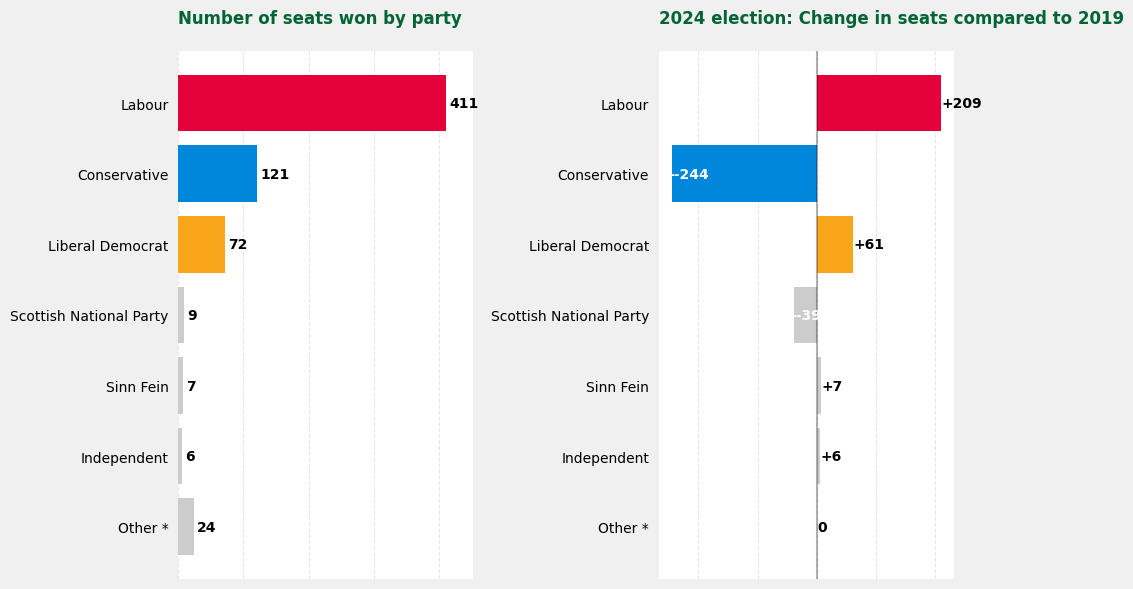

In [79]:
# Keep only top parties and group the rest as 'Other'
top_parties = merged_seats.head(6)
other_parties = merged_seats.iloc[6:]

# Create 'Other' row if there are smaller parties
if len(other_parties) > 0:
    other_row = pd.DataFrame({
        'Party name': ['Other *'],
        'Seats_2024': [other_parties['Seats_2024'].sum()],
        'Seats_2019': [other_parties['Seats_2019'].sum()],
        'Changes': [other_parties['Changes'].sum()]
    })

    # Combine top parties with 'Other'
    final_data = pd.concat([top_parties, other_row], ignore_index=True)
else:
    final_data = top_parties

# Define party colors
party_colors = {
    'Conservative': '#0087DC',
    'Labour': '#E4003B',
    'SNP': '#FDF38E',
    'Liberal Democrat': '#FAA61A',
    'DUP': '#D46A4C',
    'Sinn Féin': '#126357',
    'Other *': '#CCCCCC'
}

# Create a list of colors in the same order as the parties in the dataframe
colors = [party_colors.get(party, '#CCCCCC') for party in final_data['Party name']]

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,6), facecolor='#f0f0f0')
fig.subplots_adjust(wspace=0.3)

# First subplot - Seat totals
ax1.barh(final_data['Party name'], final_data['Seats_2024'], color=colors)
ax1.set_title('Number of seats won by party', fontsize=12, color='#006435', fontweight='bold', loc='left', pad=20)
ax1.invert_yaxis()  # To match the order in the image
ax1.set_xlim(0, max(final_data['Seats_2024']) * 1.1)
ax1.grid(axis='x', linestyle='--', alpha=0.3)
ax1.set_axisbelow(True)

# Add seat numbers at the end of each bar
for i, v in enumerate(final_data['Seats_2024']):
    ax1.text(v + 5, i, str(int(v)), va='center', fontweight='bold')

# Remove the frame and ticks
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax1.tick_params(axis='y', which='both', left=False)

# Calculate total seats that changed hands
total_changes = int(final_data['Changes'].abs().sum() / 2)  # Divide by 2 because each change affects two parties

# Second subplot - Seat changes
ax2.barh(final_data['Party name'], final_data['Changes'], color=colors)
ax2.set_title('2024 election: Change in seats compared to 2019',
              fontsize=12, color='#006435', fontweight='bold', loc='left', pad=20)
ax2.invert_yaxis()  # To match the order in the image
ax2.axvline(x=0, color='black', alpha=0.3)
ax2.grid(axis='x', linestyle='--', alpha=0.3)
ax2.set_axisbelow(True)

# Add change numbers at the end of each bar
for i, v in enumerate(final_data['Changes']):
    if v > 0:
        ax2.text(v + 1, i, f"+{int(v)}", va='center', fontweight='bold')
    elif v < 0:
        ax2.text(v - 6, i, f"-{int(v)}", va='center', fontweight='bold', color='white')
    else:
        ax2.text(v + 1, i, str(int(v)), va='center', fontweight='bold')

# Remove the frame and ticks
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2.tick_params(axis='y', which='both', left=False)

plt.tight_layout()
plt.show()

<Figure size 1400x1000 with 0 Axes>

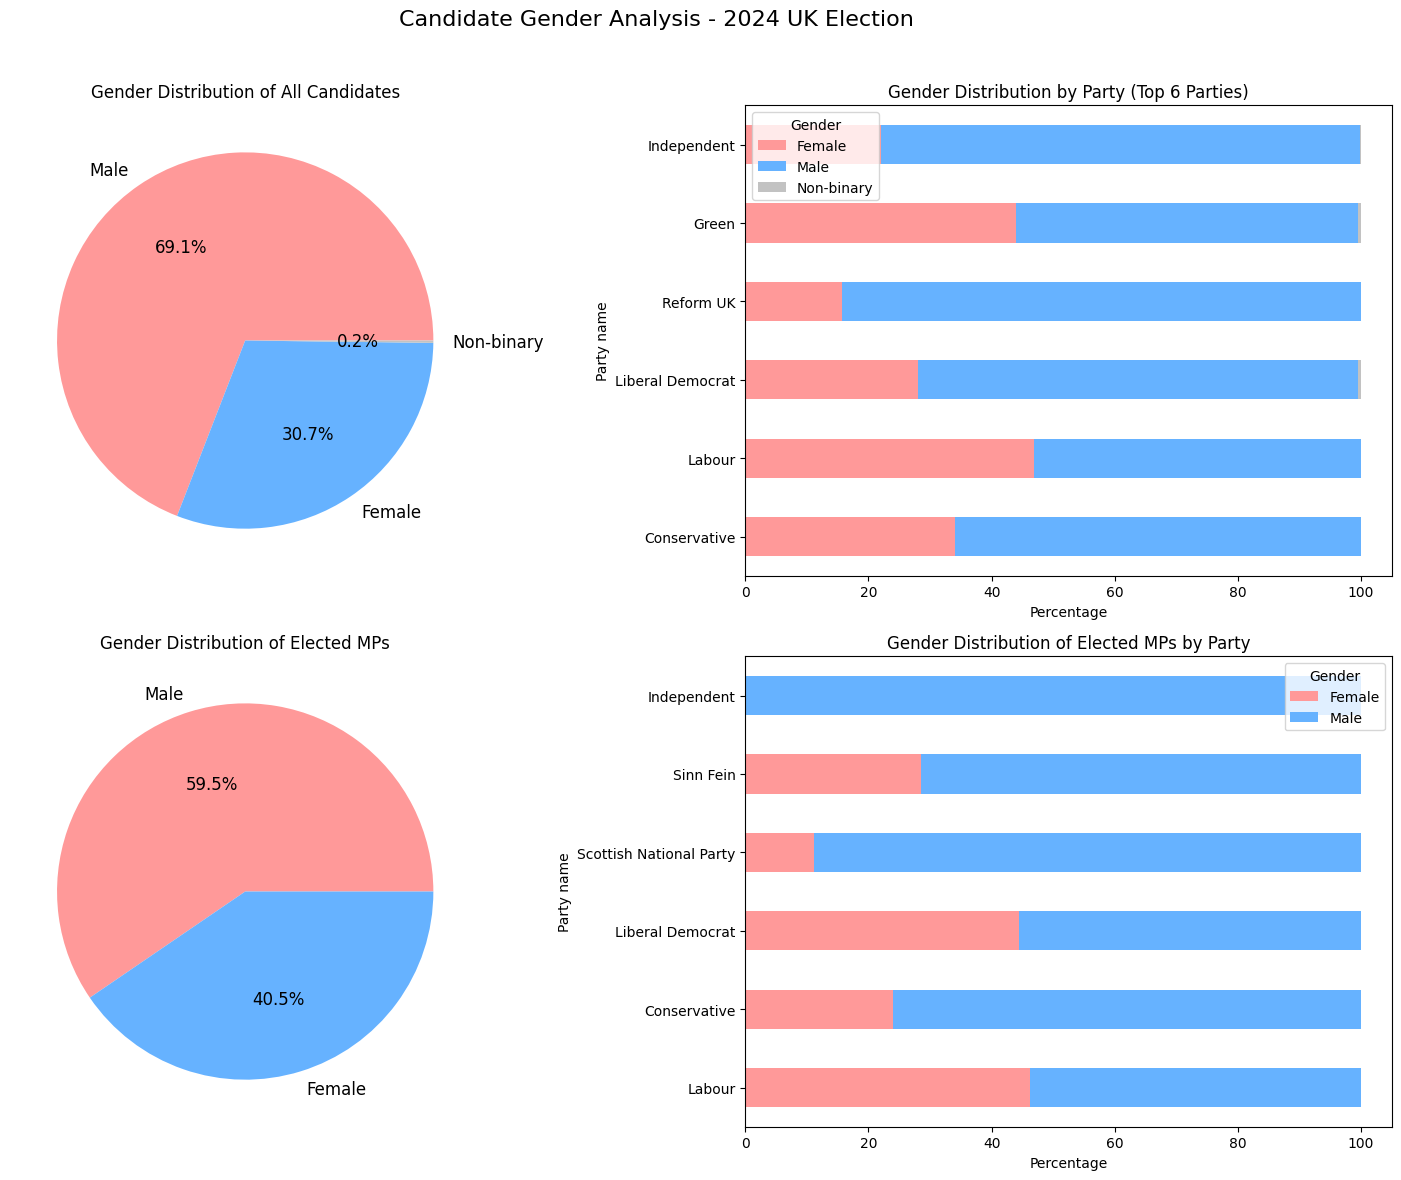

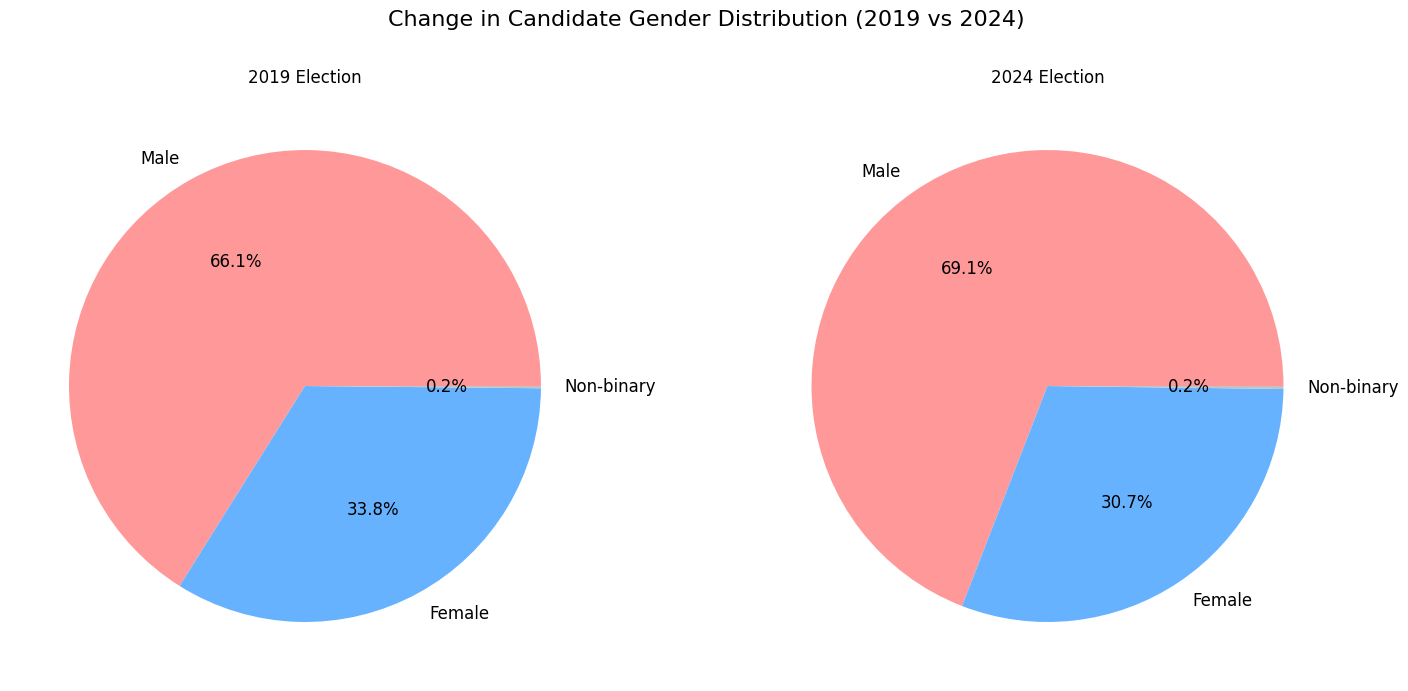

In [80]:
# 1. Overall gender distribution of all candidates
plt.figure(figsize=(14, 10))

# Create subplot layout
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Candidate Gender Analysis - 2024 UK Election', fontsize=16)

# Plot 1: Overall gender distribution (pie chart)
gender_counts = df_2024['Candidate gender'].value_counts()
axes[0, 0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',
              colors=['#FF9999', '#66B2FF', '#C2C2C2'],
              textprops={'fontsize': 12})
axes[0, 0].set_title('Gender Distribution of All Candidates')

# Plot 2: Gender distribution by party (stacked bar chart)
# Get the top 6 parties by number of candidates
top_parties = df_2024['Party name'].value_counts().head(6).index.tolist()
party_gender = pd.crosstab(df_2024['Party name'], df_2024['Candidate gender'])

# Filter for top parties only
party_gender_filtered = party_gender.loc[top_parties]

# Plot as stacked percentage
party_gender_pct = party_gender_filtered.div(party_gender_filtered.sum(axis=1), axis=0) * 100
party_gender_pct.plot(kind='barh', stacked=True, ax=axes[0, 1],
                      color=['#FF9999', '#66B2FF', '#C2C2C2'])
axes[0, 1].set_title('Gender Distribution by Party (Top 6 Parties)')
axes[0, 1].set_xlabel('Percentage')
axes[0, 1].legend(title='Gender')

# Plot 3: Gender of winning candidates (pie chart)
winners = df_2024.loc[df_2024.groupby('Constituency name')['Votes'].idxmax()]
winner_gender = winners['Candidate gender'].value_counts()
axes[1, 0].pie(winner_gender, labels=winner_gender.index, autopct='%1.1f%%',
              colors=['#FF9999', '#66B2FF', '#C2C2C2'],
              textprops={'fontsize': 12})
axes[1, 0].set_title('Gender Distribution of Elected MPs')

# Plot 4: Gender of winning candidates by party
winners_by_party_gender = pd.crosstab(winners['Party name'], winners['Candidate gender'])
top_winner_parties = winners['Party name'].value_counts().head(6).index.tolist()
winners_by_party_gender_filtered = winners_by_party_gender.loc[top_winner_parties]

# Calculate percentages
winners_party_gender_pct = winners_by_party_gender_filtered.div(
    winners_by_party_gender_filtered.sum(axis=1), axis=0) * 100
winners_party_gender_pct.plot(kind='barh', stacked=True, ax=axes[1, 1],
                             color=['#FF9999', '#66B2FF', '#C2C2C2'])
axes[1, 1].set_title('Gender Distribution of Elected MPs by Party')
axes[1, 1].set_xlabel('Percentage')
axes[1, 1].legend(title='Gender')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout for the suptitle
plt.savefig('candidate_gender_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

# Optional: Comparison with 2019 data
if 'df_2019' in globals():
    # Create comparison plot between 2019 and 2024
    fig, axes = plt.subplots(1, 2, figsize=(15, 7))
    fig.suptitle('Change in Candidate Gender Distribution (2019 vs 2024)', fontsize=16)

    # 2019 gender distribution
    gender_counts_2019 = df_2019['Candidate gender'].value_counts()
    axes[0].pie(gender_counts_2019, labels=gender_counts_2019.index, autopct='%1.1f%%',
                colors=['#FF9999', '#66B2FF', '#C2C2C2'],
                textprops={'fontsize': 12})
    axes[0].set_title('2019 Election')

    # 2024 gender distribution
    axes[1].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',
                colors=['#FF9999', '#66B2FF', '#C2C2C2'],
                textprops={'fontsize': 12})
    axes[1].set_title('2024 Election')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig('gender_distribution_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()